In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [ ]:
df = pd.read_csv('../input/croppredict/Finalcrop_Prediction.csv')
# df=pd.read_csv('')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,soil,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,loamy,rice
1,90,42,43,20.879744,82.002744,6.502985,202.935536,clayey,rice
2,85,58,41,21.770462,80.319644,7.038096,226.655537,loamy,rice
3,85,58,41,21.770462,80.319644,7.038096,226.655537,clayey,rice
4,60,55,44,23.004459,82.320763,7.840207,263.964248,loamy,rice


In [ ]:
df1=pd.get_dummies(df['soil'])

In [ ]:
df1.head()

,black,clayey,loamy,red,sandy
0,0,0,1,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [ ]:
df['soil']=pd.get_dummies(df['soil'])

In [ ]:
df.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall  soil   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536     0    rice
1      90  42  43    20.879744  82.002744  6.502985  202.935536     0    rice
2      85  58  41    21.770462  80.319644  7.038096  226.655537     0    rice
3      85  58  41    21.770462  80.319644  7.038096  226.655537     0    rice
4      60  55  44    23.004459  82.320763  7.840207  263.964248     0    rice
...   ...  ..  ..          ...        ...       ...         ...   ...     ...
4195  118  33  30    24.131797  67.225123  6.362608  173.322839     0  coffee
4196  117  32  34    26.272418  52.127394  6.758793  127.175293     0  coffee
4197  117  32  34    26.272418  52.127394  6.758793  127.175293     0  coffee
4198  104  18  30    23.603016  60.396475  6.779833  140.937041     0  coffee
4199  104  18  30    23.603016  60.396475  6.779833  140.937041     0  coffee

[4200 rows x 9 columns]>

In [ ]:
 result = pd.concat([df,df1], axis=1)

In [ ]:
result

,N,P,K,temperature,humidity,ph,rainfall,soil,label,black,clayey,loamy,red,sandy
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0,rice,0,0,1,0,0
1,90,42,43,20.879744,82.002744,6.502985,202.935536,0,rice,0,1,0,0,0
2,85,58,41,21.770462,80.319644,7.038096,226.655537,0,rice,0,0,1,0,0
3,85,58,41,21.770462,80.319644,7.038096,226.655537,0,rice,0,1,0,0,0
4,60,55,44,23.004459,82.320763,7.840207,263.964248,0,rice,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,118,33,30,24.131797,67.225123,6.362608,173.322839,0,coffee,0,1,0,0,0
4196,117,32,34,26.272418,52.127394,6.758793,127.175293,0,coffee,0,0,0,0,1
4197,117,32,34,26.272418,52.127394,6.758793,127.175293,0,coffee,0,1,0,0,0
4198,104,18,30,23.603016,60.396475,6.779833,140.937041,0,coffee,0,0,0,0,1


In [ ]:
result.drop(['soil'],axis=1,inplace=True)

In [ ]:
result

,N,P,K,temperature,humidity,ph,rainfall,label,black,clayey,loamy,red,sandy
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,0,1,0,0
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,1,0,0,0
2,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,0,1,0,0
3,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,1,0,0,0
4,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,0,1,0,0,0
4196,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,0,0,0,0,1
4197,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,0,1,0,0,0
4198,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,0,0,0,0,1


In [ ]:
df=result
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,black,clayey,loamy,red,sandy
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,0,1,0,0
1,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0,1,0,0,0
2,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,0,1,0,0
3,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0,1,0,0,0
4,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0,0,1,0,0


In [ ]:
df.size

54600

In [ ]:
df.shape

(4200, 13)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'black', 'clayey', 'loamy', 'red', 'sandy'],
      dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
acc = []
model = []

# **Stratified Random Sampling**

In [ ]:
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_val=0.15, frac_test=0.25,
                                         random_state=None):
    

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_val, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    X = df_input # Contains all columns.
    y = df_input[[stratify_colname]] # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(X,
                                                          y,
                                                          stratify=y,
                                                          test_size=(1.0 - frac_train),
                                                          random_state=random_state)

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(df_temp,
                                                      y_temp,
                                                      stratify=y_temp,
                                                      test_size=relative_frac_test,
                                                      random_state=random_state)

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

In [ ]:
df_train, df_val, df_test = split_stratified_into_train_val_test(df, stratify_colname='label', frac_train=0.60, frac_val=0.20, frac_test=0.20)

In [ ]:
print(df_train.shape,df_val.shape,df_test.shape,sep='\n')

(2520, 13)
(840, 13)
(840, 13)


In [ ]:
Xtrain = df_train[['N','P','K','temperature', 'humidity', 'ph', 'rainfall','black','clayey','red','loamy','sandy']]
Ytrain = df_train['label']

Xtest = df_test[['N','P','K','temperature', 'humidity', 'ph', 'rainfall','black','clayey','red','loamy','sandy']]
Ytest = df_test['label']

XValidate = df_val[['N','P','K','temperature', 'humidity', 'ph', 'rainfall','black','clayey','red','loamy','sandy']]
YValidate = df_val['label']


In [ ]:
print(Xtrain.shape,Ytrain.shape,XValidate.shape,YValidate.shape)

(2520, 12) (2520,) (840, 12) (840,)


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# **Checking ratios of:**

*   Training
*   Testing
*   Validating






In [ ]:
my_list = Ytrain.unique()
my_dict = dict() 
for index,value in enumerate(my_list):
  my_dict[value] = 0
print(my_dict)
arr=[]

{'apple': 0, 'maize': 0, 'chickpea': 0, 'grapes': 0, 'cotton': 0, 'kidneybeans': 0, 'mothbeans': 0, 'blackgram': 0, 'mango': 0, 'muskmelon': 0, 'jute': 0, 'pomegranate': 0, 'watermelon': 0, 'rice': 0, 'lentil': 0, 'pigeonpeas': 0, 'coffee': 0, 'papaya': 0, 'mungbean': 0, 'coconut': 0, 'orange': 0, 'banana': 0}


In [ ]:
my_list = Ytrain.unique()
my_dict = dict() 
for index,value in enumerate(my_list):
  my_dict[value] = 0


for i in Ytrain:
  my_dict[i]+=1
print(my_dict)

{'apple': 60, 'maize': 120, 'chickpea': 240, 'grapes': 120, 'cotton': 120, 'kidneybeans': 180, 'mothbeans': 60, 'blackgram': 120, 'mango': 120, 'muskmelon': 60, 'jute': 180, 'pomegranate': 60, 'watermelon': 120, 'rice': 120, 'lentil': 60, 'pigeonpeas': 180, 'coffee': 120, 'papaya': 120, 'mungbean': 60, 'coconut': 180, 'orange': 60, 'banana': 60}


In [ ]:
my_list = Ytrain.unique()
my_dict = dict() 
for index,value in enumerate(my_list):
  my_dict[value] = 0

for i in Ytest:
  my_dict[i]+=1
print(my_dict)

{'apple': 20, 'maize': 40, 'chickpea': 80, 'grapes': 40, 'cotton': 40, 'kidneybeans': 60, 'mothbeans': 20, 'blackgram': 40, 'mango': 40, 'muskmelon': 20, 'jute': 60, 'pomegranate': 20, 'watermelon': 40, 'rice': 40, 'lentil': 20, 'pigeonpeas': 60, 'coffee': 40, 'papaya': 40, 'mungbean': 20, 'coconut': 60, 'orange': 20, 'banana': 20}


In [ ]:
my_list = Ytrain.unique()
my_dict = dict() 
for index,value in enumerate(my_list):
  my_dict[value] = 0


for i in YValidate:
  my_dict[i]+=1
print(my_dict)

{'apple': 20, 'maize': 40, 'chickpea': 80, 'grapes': 40, 'cotton': 40, 'kidneybeans': 60, 'mothbeans': 20, 'blackgram': 40, 'mango': 40, 'muskmelon': 20, 'jute': 60, 'pomegranate': 20, 'watermelon': 40, 'rice': 40, 'lentil': 20, 'pigeonpeas': 60, 'coffee': 40, 'papaya': 40, 'mungbean': 20, 'coconut': 60, 'orange': 20, 'banana': 20}


In [ ]:
svc=SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale','auto']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(XValidate, YValidate)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.983333 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
svm=SVC(C=50,gamma='scale',kernel='poly')
svm.fit(Xtrain,Ytrain)

predicted_values = svm.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  99.16666666666667
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.98      1.00      0.99        40
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        60
      coffee       1.00      1.00      1.00        40
      cotton       0.98      1.00      0.99        40
      grapes       1.00      1.00      1.00        40
        jute       0.95      0.97      0.96        60
 kidneybeans       1.00      1.00      1.00        60
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.95      0.97        40
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(svm,Xtest,Ytest,cv=5)
score

array([0.99404762, 0.98809524, 0.98809524, 0.98809524, 0.98809524])

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()
criterion=['gini', 'entropy']
splitter=['best', 'random']
# define grid search
grid = dict(criterion=criterion,splitter=splitter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(XValidate, YValidate)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.976587 using {'criterion': 'gini', 'splitter': 'best'}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dsc=DecisionTreeClassifier(criterion='entropy',splitter='best')
dsc.fit(Xtrain,Ytrain)

predicted_values = dsc.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  99.52380952380952
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      0.95      0.97        20
   blackgram       1.00      1.00      1.00        40
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        60
      coffee       1.00      1.00      1.00        40
      cotton       1.00      1.00      1.00        40
      grapes       1.00      1.00      1.00        40
        jute       0.98      0.97      0.97        60
 kidneybeans       1.00      1.00      1.00        60
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        40
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(dsc,Xtest,Ytest,cv=5)
score

array([0.95238095, 0.96428571, 0.9702381 , 0.95833333, 0.98809524])

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
Model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=Model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(XValidate, YValidate)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.994841 using {'max_features': 'sqrt', 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,max_features='sqrt')
rfc.fit(Xtrain,Ytrain)


RandomForestClassifier(max_features='sqrt')

In [ ]:

predicted_values = rfc.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9976190476190476
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        40
    chickpea       1.00      1.00      1.00        80
     coconut       1.00      1.00      1.00        60
      coffee       1.00      1.00      1.00        40
      cotton       1.00      1.00      1.00        40
      grapes       1.00      1.00      1.00        40
        jute       0.98      0.98      0.98        60
 kidneybeans       1.00      1.00      1.00        60
      lentil       1.00      1.00      1.00        20
       maize       1.00      1.00      1.00        40
       mango       1.00      1.00      1.00        40
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rfc,Xtest,Ytest,cv=5)
score

array([0.99404762, 0.99404762, 1.        , 0.99404762, 0.99404762])

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
lr = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(XValidate,YValidate)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.984127 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9678571428571429
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.88      0.93      0.90        40
    chickpea       1.00      1.00      1.00        80
     coconut       0.98      1.00      0.99        60
      coffee       1.00      0.97      0.99        40
      cotton       0.95      0.90      0.92        40
      grapes       1.00      1.00      1.00        40
        jute       0.92      0.95      0.93        60
 kidneybeans       1.00      1.00      1.00        60
      lentil       0.95      0.90      0.92        20
       maize       0.90      0.93      0.91        40
       mango       1.00      1.00      1.00        40
   mothbeans       0.80      0.80      0.80        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00   

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
score = cross_val_score(LogReg,Xtest,Ytest,cv=5)
score

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.94047619, 0.95238095, 0.98214286, 0.92261905, 0.93452381])

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Algorithm', ylabel='Accuracy'>

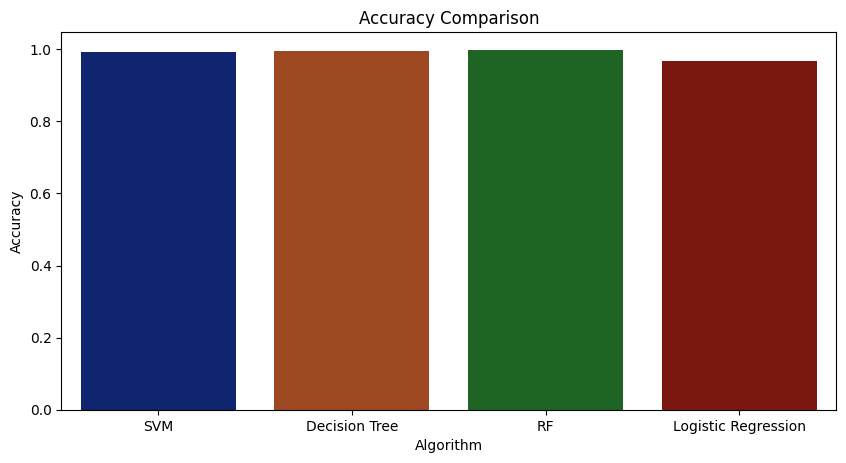

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
sns.barplot(x = model,y = acc,palette='dark')

In [ ]:
acc

[0.9916666666666667,
 0.9952380952380953,
 0.9976190476190476,
 0.9678571428571429]

In [ ]:
model

['SVM', 'Decision Tree', 'RF', 'Logistic Regression']